# Yhdistetään kaikki kulutus yhteen dataframeen

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.response
from urllib.parse import urlparse
import datetime
import calendar
import matplotlib.dates as mdates
from urllib.parse import unquote
from sklearn import linear_model
# https://helsinki-openapi.nuuka.cloud/swagger/index.html
# https://www.youtube.com/watch?v=CnqdapOHh8g
# https://dev.hel.fi/paatokset/media/att/0c/0c1a38feb6f9a7b282efd0716c329508eff375cc.pdf

pd.set_option('display.max_colwidth', -1) # näytetään sarakeotsikot kokonaan
pd.set_option('display.max_rows', None) # näytetään kaikki rivit

In [20]:
# LISTA KAIKISTA ALOISTA
industries = ['C%20kauppahalli','G%20monitoimitalo',
'F%20lasten%20p%C3%A4iv%C3%A4koti','G%20muu%20kokoontuminen',
'D%20toimisto','H%20ala-aste%20ja%20yl%C3%A4aste',
'H%20ammattiopetus%20ja%20-korkeak.','N%20maa-%20ja%20mets%C3%A4talous',
'N%20muu%20toimiala','K%20varasto',
'G%20kirjasto','C%20ravintola',
'F%20leikkipuisto','G%20museo',
'J%20tukikohta','C%20asuntola',
'C%20muu%20kauppa','A%20asuminen',
'F%20terveyskeskus','G%20liikuntatoimi',
'J%20muu%20tuotanto/teollisuus','H%20muu%20opetusrakennus',
'E%20liikenne','L%20v%C3%A4est%C3%B6nsuoja',
'C%20muu%20halli-%20ja%20ulkomyynti','F%20muu%20sosiaalihuollon%20laitos',
'F%20sairaala','F%20hoitokoti',
'L%20pelastusasema','H%20lukio', 'F%20vanhainkoti']

dfelec = pd.DataFrame() # ALUSTETAAN DATAFRAME, JOHON TULEE SÄHKÖNKULUTUSDATA
dfheat = pd.DataFrame() # ALUSTETAAN DATAFRAME, JOHON TULEE LÄMMÖNKULUTUSDATA

for x in industries: # KÄYDÄÄN LÄPI INDUSTRIES LISTA
    try:
        df = pd.read_json('https://helsinki-openapi.nuuka.cloud/api/v1.0/EnergyData/Monthly/ListByProperty?Record=PurposeOfUse&SearchString=' + x + '&ReportingGroup=Electricity&StartTime=1990-01-01&EndTime=2019-12-31')
        #df = pd.DataFrame(df.groupby(['purposeOfUse', 'year'])['value'].sum())
        #dfvalmis = pd.concat([dfvalmis, df])
        nimi = x.replace("%20", " ").replace("%C3%A4", "ä").replace("%C3%B6", "ö") # MUUTETAAN NIMI LUETTAVAMPAAN MUOTOON
        dfelec[nimi] = df.groupby('timestamp')['value'].sum() # TEHDÄÄN KOHTEELLE OMA SARAKE
    except:
        print(x) # JOS TULEE ONGELMIA, TULOSTETAAN KYSEINEN KOHDE

for x in industries: # KÄYDÄÄN LÄPI INDUSTRIES LISTA
    try:
        df = pd.read_json('https://helsinki-openapi.nuuka.cloud/api/v1.0/EnergyData/Monthly/ListByProperty?Record=PurposeOfUse&SearchString=' + x + '&ReportingGroup=Heat&StartTime=1990-01-01&EndTime=2019-12-31&Normalization=false')
        #df = pd.DataFrame(df.groupby(['purposeOfUse', 'year'])['value'].sum())
        #dfvalmis = pd.concat([dfvalmis, df])
        nimi = x.replace("%20", " ").replace("%C3%A4", "ä").replace("%C3%B6", "ö") # MUUTETAAN NIMI LUETTAVAMPAAN MUOTOON
        dfheat[nimi] = df.groupby('timestamp')['value'].sum() # TEHDÄÄN KOHTEELLE OMA SARAKE
    except:
        print(x) # JOS TULEE ONGELMIA, TULOSTETAAN KYSEINEN KOHDE

dfelec["electricity"] = dfelec.sum(axis=1) # SUMMATAAN RIVIT, JOTTA SAAHAAN YHTEISKULUTUS
dfelec["heat"] = dfheat.sum(axis=1) # SUMMATAAN RIVIT, JOTTA SAAHAAN YHTEISKULUTUS


dfelec.reset_index(inplace=True)
dfelec['timestamp'] = df['timestamp'].map(lambda x: str(x.year)) # TEHDÄÄN TIMESTAMPISTA PELKÄSTÄÄN VUOSI
#dfelec['timestamp'] = df['timestamp'].map(lambda x: str(x.year) + "-" + str(x.month))
dfelec.set_index('timestamp', inplace=True)
print('valmis')

C%20muu%20halli-%20ja%20ulkomyynti
valmis


  ### Kokonaiskulutus arvio vuosilta 1990 - 2019
  2000-2010 data todella rajallista.
  Luotettavin data vuosilta 2016-2020

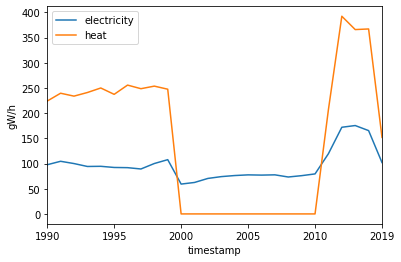

In [3]:
dfelec = dfelec.groupby('timestamp').sum() # SUMMATAAN KAIKKI KULUTUS TIMESTAMPIN MUKAAN
dfelec2 = pd.DataFrame(dfelec.groupby('timestamp')['electricity'].sum()) # GROUPATAAN TIMESTAMPIN MUKAAN JA SUMMATAAN KAIKKI SÄHKÖN YHTEISKULUTUS
dfheat2 = pd.DataFrame(dfelec.groupby('timestamp')['heat'].sum()) # GROUPATAAN TIMESTAMPIN MUKAAN JA SUMMATAAN KAIKKI LÄMMÖN YHTEISKULUTUS
dfelec2['electricity'] = dfelec2['electricity'] * 10**-6 # MUUTETAAN KILOWATIT GIGAWATEIKSI
dfelec2['heat'] = dfheat2['heat'] * 10**-6 # MUUTETAAN KILOWATIT GIGAWATEIKSI
dfelec2.plot() # TEHDÄÄN KUVIO KULUTUKSESTA VUOSITTAIN
plt.ylabel('gW/h') # Y-AKSELIN OTSIKKO
plt.show()

### Minimi ja maximi vuosi aloittain

In [5]:
dfm = pd.DataFrame(dfelec.idxmax()) # TEHDÄÄN DATAFRAME, JOHON TALLENNETAAN JOKAISEN ALAN MAXIMIKULUTUS-VUOSI
dfm[1] = dfelec.idxmin() # TEHDÄÄN TOINEN SARAKE, JOHON TULEE MINIMIKULUTUS-VUOSI
dfm.rename(columns={0:'max', 1:'min'}, inplace=True) # MUUTETAAN SARAKKEIDEN NIMET
dfm # TULOSTETAAN DATAFRAME

,max,min
C kauppahalli,2016,2000
G monitoimitalo,2017,1990
F lasten päiväkoti,2017,1990
G muu kokoontuminen,2017,2000
D toimisto,2007,2000
H ala-aste ja yläaste,2017,1990
H ammattiopetus ja -korkeak.,2018,1996
N maa- ja metsätalous,2016,2000
N muu toimiala,2016,1990
K varasto,2016,1990


### Barplot ja pieplot kuukausittaisen sähkönkulutuksesta keskimäärin 2016-2019

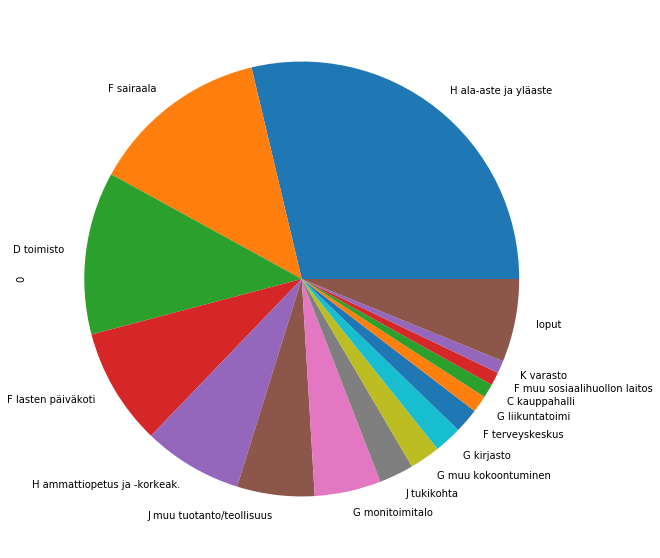

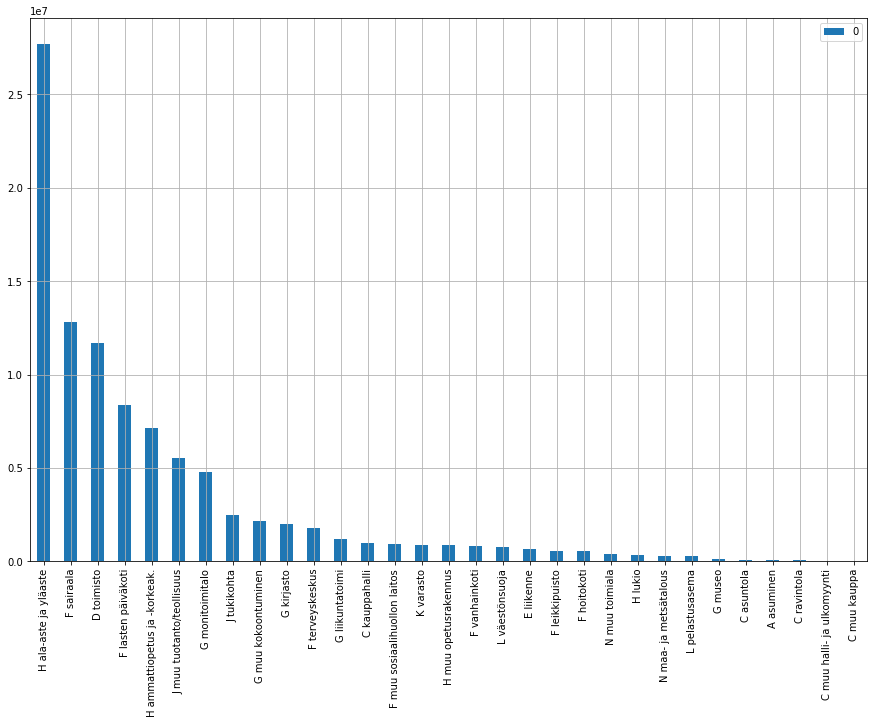

In [11]:
dfvalmis = dfelec.drop(columns=['electricity', 'heat']) # LUODAAN UUSI DATAFRAME, JOSSA EI OLE 
testi = pd.DataFrame(dfvalmis.mean()) # LASKETAAN JOKAISEN KOHTEEN VUOSITTAINEN KESKIARVO
dft = testi.sort_values(by=0, ascending=False) # LAJITELLAAN KULUTUKSEN MUKAAN LASKEVASTI

# OTETAAN DATAFRAMESTA 15 ENSIMMÄISTÄ TALTEEN, JA YHDISTETÄÄN LOPUISTA YHTEISSARAKE

dft2 = dft[:15].copy()
dft2.reset_index(inplace=True)

new_row = pd.DataFrame(data = {
    'index' : ['loput'],
    0 : [dft[0][15:].sum()]
})


dft2 = pd.concat([dft2, new_row]) # YHDISTETÄÄN DATAFRAMET
dft2 = dft2.set_index('index') # ASETETAAN INDEX SARAKE
dft2.plot.pie(subplots=True, figsize=[10,10], legend=False) # TEHDÄÄN PIEBLOT

dft.plot.bar(grid=True, figsize=(15,10)) # BARPLOT
plt.show()

### Kaukojäähdytyksen yleistyminen

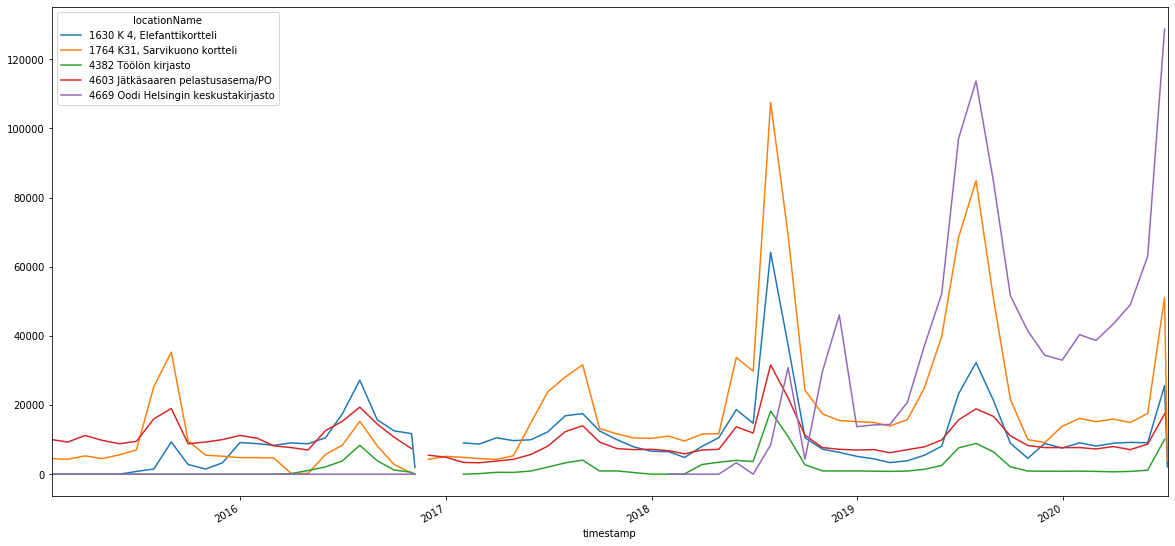

In [7]:
# AINOASTAAN NÄISTÄ KOLMESTA LÖYTYY KAUKOJÄÄHDYTYSTIETOJA
distcool = ['D%20toimisto', 'G%20kirjasto', 'L%20pelastusasema'] # LISTA KOHTEISTA
dfcool = pd.DataFrame() # TYHJÄ DATAFRAME

for x in distcool: # SILMUKKA KOHDELISTASTA
    # HAETAAN DATA
    df2 = pd.read_json("https://helsinki-openapi.nuuka.cloud/api/v2.0/EnergyData/Monthly/ListByProperty?Record=PurposeOfUse&SearchString=" + x + "&ReportingGroup=DistrictCooling&StartTime=2010-01-01&EndTime=2020-12-31")
    # YHDISTETÄÄN DATAFRAMET
    dfcool = pd.concat([dfcool, df2])

dftesti = dfcool.pivot(index='timestamp', columns='locationName', values='value') # TEHDÄÄN PIVOTILLA DATAFRANESTA HELPOMMIN KÄSITELTÄVÄ
dftesti.plot(figsize=(20,10)) # TEHDÄÄN KAAVIO


In [26]:
dfelec2

,electricity,heat
timestamp,,
1990,97.635628,224.020784
1991,104.476474,239.584256
1992,99.970866,233.816743
1993,94.186725,240.997950
1994,94.511956,249.988253
1995,92.211372,237.372339
1996,91.820186,255.718906
1997,89.204062,248.574421
1998,100.048595,253.677118
